# EIT Continous Model - Tutorial Mesh

In [1]:
from module1_mesh import*
from module2_forward import*
from module3_inverse import*
from module4_auxiliar import*
import matplotlib.pyplot as plt
#from fenics import*

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


### Defining mesh - Circle

In [2]:
mesh_inverse, mesh_direct=MyMesh(r=1, n=8, n_vertex=121)

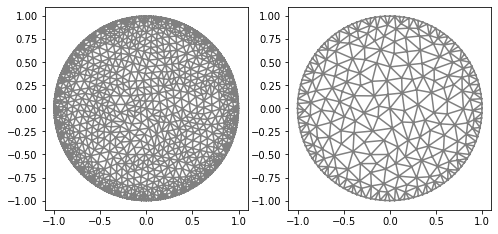

In [3]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_direct);
plt.subplot(1,2,2)
plot(mesh_inverse);

In [4]:
def current_method(n_g, value=1, method=1):
    """This function an expression that represent the current in the vertex.
        
    :param n_g: Measurements number.
    :type n_g: int
    :param value: value in the vertex.
    :type value: float
    :param method: Current pattern.
    :type method: int
    :returns:  Expression -- Return list of expressions.
    
    Method Values:           
        1. 1 and -1 in opposite direction, where 50% of the boundary is 0.
        
    :Example:

        .. code-block:: python

           "Current"
            n_g=2
            list_gs=current_method(n_g, value=1, method=1)

            for i in range(n_g):
                mesh=mesh_direct
                VD=FiniteElement('CG',mesh.ufl_cell(),1) 
                g_u=interpolate(list_gs[i], FunctionSpace(mesh,VD))
                g_u=getBoundaryVertex(mesh, g_u)
                bond=plot_boundary(mesh, data=g_u, name='boundary g'+str(i))

        .. image:: codes/current1.png
           :scale: 75 %       
           """
    h=pi/n_g/2
    if method==1:
        list_gs=[Expression(f" x[0]<cos(0+{h*i}) && x[0]>cos({h}+{h*i}) && x[1]>0 ? {value} : "+
                            f"(x[0]>cos(pi+{h*i}) && x[0]<cos(pi+{h}+{h*i}) && x[1]<0 ? -{value} : 0 )"
                            ,degree=1) for i in range(0,n_g*2,2)]
    elif method==2:
        list_gs=[Expression(f" x[1]>=0 ? {value}*sin(acos(x[0])*{i+1}) : \
                                 {value}*sin((-acos(x[0]))*{i+1})",degree=1) for i in range(0,n_g)]
    return list_gs

### Current Method 1

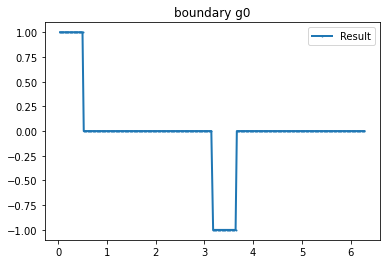

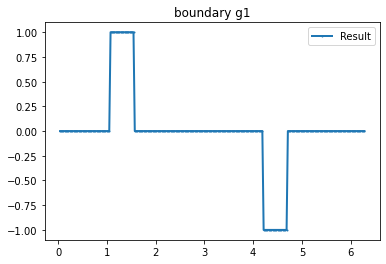

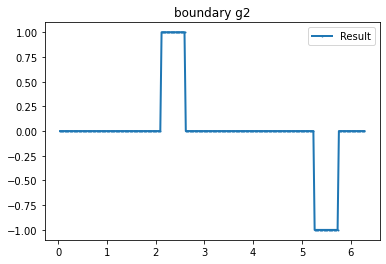

In [5]:
"Current"
n_g=3 #Number currents
I_all=current_method(n_g, value=1, method=1) #Creating current

#Plotting
for i in range(n_g):
        mesh=mesh_direct
        VD=FiniteElement('CG',mesh.ufl_cell(),1) 
        g_u=interpolate(I_all[i], FunctionSpace(mesh,VD))
        g_u=getBoundaryVertex(mesh, g_u)
        bond=plot_boundary(mesh, data=g_u, name='boundary g'+str(i))


In [6]:
print("Mesh Direct:")
Verifyg(I_all, mesh_direct)
print("\n Mesh Inverse:")
Verifyg(I_all, mesh_inverse)

Mesh Direct:
Integral boundary: 2.42861286636753e-16 0
Integral boundary: -1.3357370765021415e-16 1
Integral boundary: -3.122502256758253e-16 2
Integral boundary g(0)*g(1): 0.0
Integral boundary g(0)*g(2): 0.0
Integral boundary g(1)*g(2): 0.0

 Mesh Inverse:
Integral boundary: 3.469446951953614e-18 0
Integral boundary: -9.020562075079397e-17 1
Integral boundary: -3.469446951953614e-17 2
Integral boundary g(0)*g(1): 0.0
Integral boundary g(0)*g(2): 0.0
Integral boundary g(1)*g(2): 0.0


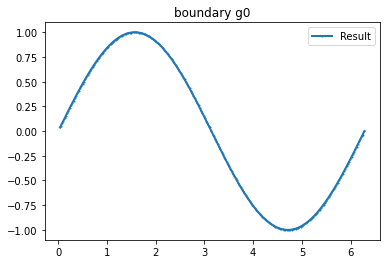

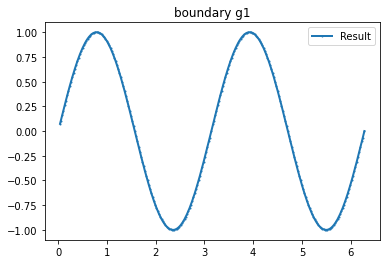

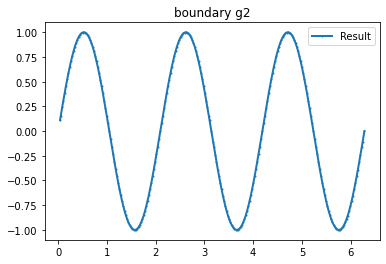

In [7]:
"Current"
n_g=3 #Number currents
I_all=current_method(n_g, value=1, method=2) #Creating current

#Plotting
for i in range(n_g):
        mesh=mesh_direct
        VD=FiniteElement('CG',mesh.ufl_cell(),1) 
        g_u=interpolate(I_all[i], FunctionSpace(mesh,VD))
        g_u=getBoundaryVertex(mesh, g_u)
        bond=plot_boundary(mesh, data=g_u, name='boundary g'+str(i))


In [8]:
print("Mesh Direct:")
Verifyg(I_all, mesh_direct)
print("\n Mesh Inverse:")
Verifyg(I_all, mesh_inverse)

Mesh Direct:
Integral boundary: 8.270294171719428e-16 0
Integral boundary: 4.163336342344337e-16 1
Integral boundary: -3.469446951953614e-17 2
Integral boundary g(0)*g(1): 1.0598076236045806e-17
Integral boundary g(0)*g(2): 0.0010576671174781075
Integral boundary g(1)*g(2): 4.217546450968612e-17

 Mesh Inverse:
Integral boundary: 7.4593109467002705e-16 0
Integral boundary: -2.7582103268031233e-16 1
Integral boundary: 3.122502256758253e-17 2
Integral boundary g(0)*g(1): 3.8294020732188017e-16
Integral boundary g(0)*g(2): -7.741203511546502e-17
Integral boundary g(1)*g(2): -4.85722573273506e-17


### Example 1

Integral boundary: -1.4991805540043313e-16 0


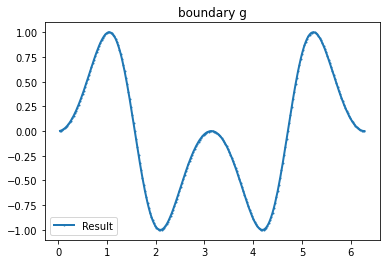

In [9]:
myI1=Expression(" sin(x[0]*pi) ",degree=2)

g_u=interpolate(myI1, FunctionSpace(mesh,VD))
g_u2=getBoundaryVertex(mesh, g_u)
bond=plot_boundary(mesh, data=g_u2, name='boundary g')

Verifyg([g_u], mesh_direct)

### Example 2

-1.6306400674181987e-15


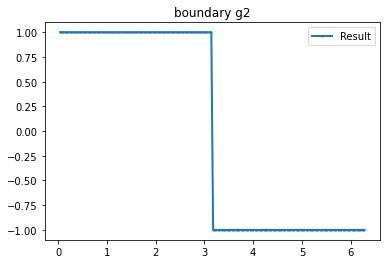

In [10]:
myI1=Expression(" x[1]>0 ? 1 :-1 ",degree=1)

g_u=interpolate(myI1, FunctionSpace(mesh,VD))
g_u2=getBoundaryVertex(mesh, g_u)
bond=plot_boundary(mesh, data=g_u2, name='boundary g'+str(i))

print(assemble(g_u*ds(mesh))) #Integral boundary

### Example 3

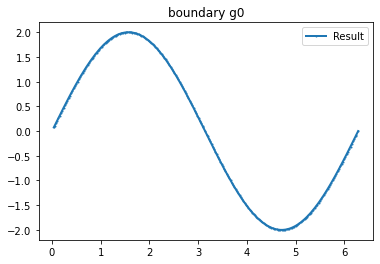

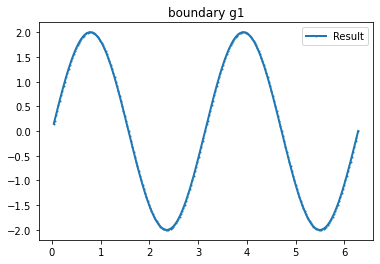

In [11]:
value=2
n_g=2

myI3=[Expression(f" x[1]>=0 ? {value}*sin(acos(x[0])*{i+1}) : {value}*sin((-acos(x[0]))*{i+1})",degree=1) for i in range(0,n_g)]
    
for i in range(n_g):
    mesh=mesh_direct
    VD=FiniteElement('CG',mesh.ufl_cell(),1) 
    g_u=interpolate(myI3[i], FunctionSpace(mesh,VD))
    g_u2=getBoundaryVertex(mesh, g_u)
    bond=plot_boundary(mesh, data=g_u2, name='boundary g'+str(i))

### Em construção.

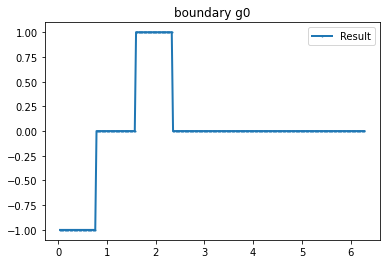

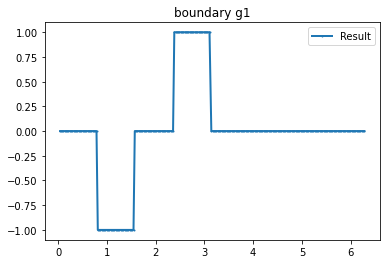

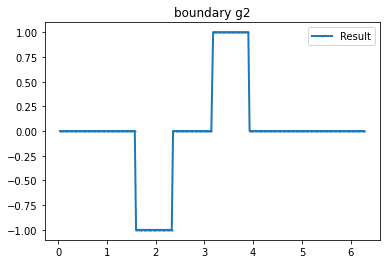

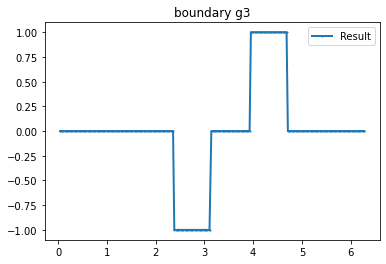

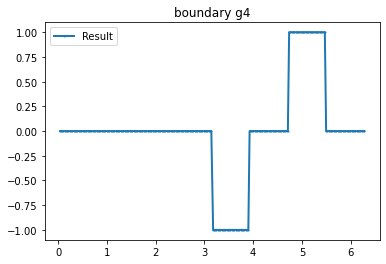

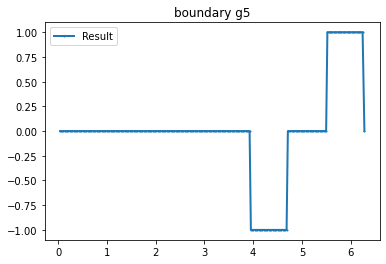

In [12]:
value=1
n_g=6
h=pi/n_g/2*3

myI3=[Expression(f" x[1]>0 ? (acos(x[0])>{h*(i)} && acos(x[0])<{h*(i+1)} ? -1 : ( acos(x[0])>{h*(i+2)} && acos(x[0])<{h*(i+3)} ? 1 : 0)) : \
                                (acos(-x[0])+pi>{h*(i)} && acos(-x[0])+pi<{h*(i+1)} ? -1 : ( acos(-x[0])+pi>{h*(i+2)} && acos(-x[0])+pi<{h*(i+3)} ? 1 : 0))",degree=1) for i in range(0,n_g )]
    
for i in range(n_g):
    mesh=mesh_direct
    VD=FiniteElement('CG',mesh.ufl_cell(),1) 
    g_u=interpolate(myI3[i], FunctionSpace(mesh,VD))
    g_u2=getBoundaryVertex(mesh, g_u)
    bond=plot_boundary(mesh, data=g_u2, name='boundary g'+str(i))

In [13]:
Verifyg(myI3, mesh)

Integral boundary: 1.1102230246251565e-16 0
Integral boundary: -1.960237527853792e-16 1
Integral boundary: 8.153200337090993e-17 2
Integral boundary: -1.9949319973733282e-16 3
Integral boundary: 7.112366251504909e-17 4
Integral boundary: -3.469446951953614e-17 5
Integral boundary g(0)*g(1): 0.0
Integral boundary g(0)*g(2): -0.7504058514923637
Integral boundary g(0)*g(3): 0.0
Integral boundary g(0)*g(4): 0.0
Integral boundary g(0)*g(5): 0.0
Integral boundary g(1)*g(2): 0.0
Integral boundary g(1)*g(3): -0.7504058514923638
Integral boundary g(1)*g(4): 0.0
Integral boundary g(1)*g(5): 0.0
Integral boundary g(2)*g(3): 0.0
Integral boundary g(2)*g(4): -0.7504058514923637
Integral boundary g(2)*g(5): 0.0
Integral boundary g(3)*g(4): 0.0
Integral boundary g(3)*g(5): -0.7504058514923637
Integral boundary g(4)*g(5): 0.0
